# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

__Решение:__ Рассмотрим функцию Лагранжа для этой задачи

$L(x, \lambda) = ||x - y||^2 + \lambda(||y||_1 - 1) = ||x - y||^2 + \lambda||y||_1 - \lambda$

$L = \sum\limits_{i = 1}^{n}((x_i - y_i)^2 + \lambda |y_i|) - \lambda$

$y_i+\lambda sign(y_i)-x_i$ - стационарность

$\lambda(\|y\|_1-1)=0$ - условие дополняющей нежесткости

$\lambda \geq 0$

При $\lambda=0$ $x\in C$, $x=y$ и проекция равна $\text{proj}_{C}(x)=x$.


При $\lambda > 0$ из условия дополняющей нежесткости $\|y\|_1=1$. Тогда $y_i=sign(x_i)max((|x_i|-\lambda),0)$.

$\|y\|_1=1$, поэтому $\sum\limits_{i = 1}^n |sign(x_i)\max((|x_i| - \lambda), 0)| = \sum\limits_{i = 1}^n |\max((|x_i| - \lambda), 0)| = 1$

$y_i = sign(x_i)(|x_i| - \lambda)$

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

__Решение:__ Рассмотрим $prox_{\lambda \mathbb{I}_C}$. 

$prox_{\lambda \mathbb{I}_C}(x)=argmin_y\begin{cases}
1/2\|x-y\|^2 ,& x \in C \\
+\infty, & x \notin C.
\end{cases}$

Тогда $prox_{\lambda \mathbb{I}_C}(x)=argmin_{y\in C}\frac{1}{2}\|x-y\|^2$. Они эквивалентны.

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

$\sum\limits_{i=1}^n l (g(w, x_i), y_i)=\sum\limits_{i=1}^n l (g(w, x_i), y_i)=\sum\limits_{i=1}^n (w^TX-y_i)^2=\sum\limits_{i=1}^n (w^TX_i-y_i)^T(w^TX_i-y_i)=\sum\limits_{i=1}^n (X_i^Tw^T-y_i^T)(w^TX_i-y_i)=(X^Tw-y^T)(w^TX-y)$

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import numpy as np
import scipy

dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [2]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
#print(n,d)
#print(y.size)

Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

В $X_{train}$ и $y_{train}$ заносим первые $0.8n$ строк и столбцов

In [3]:
n_train=int(n*0.8)
X_train=X[:n_train]
y_train=y[:n_train]
X_tst=X[n_train+1:]
y_tst=y[n_train+1:]
#print(y_train.shape)

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

In [4]:
eigvals = np.linalg.eigvalsh(X_train.T@X_train)
L = max(eigvals)
L=np.round(L+1)
L = max(eigvals)
mu = min(eigvals)

print("L= ", L)
print("mu=", mu)

L=  69664.85281776238
mu= -1.0589296229214995e-12


$\mu \approx 0$, поэтому задача выпуклая, но не сильно выпуклая

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

Для сходимости необходимо, чтобы норма шага, а значит норма градиента стремилась к 0 при приближении к искомому значению.

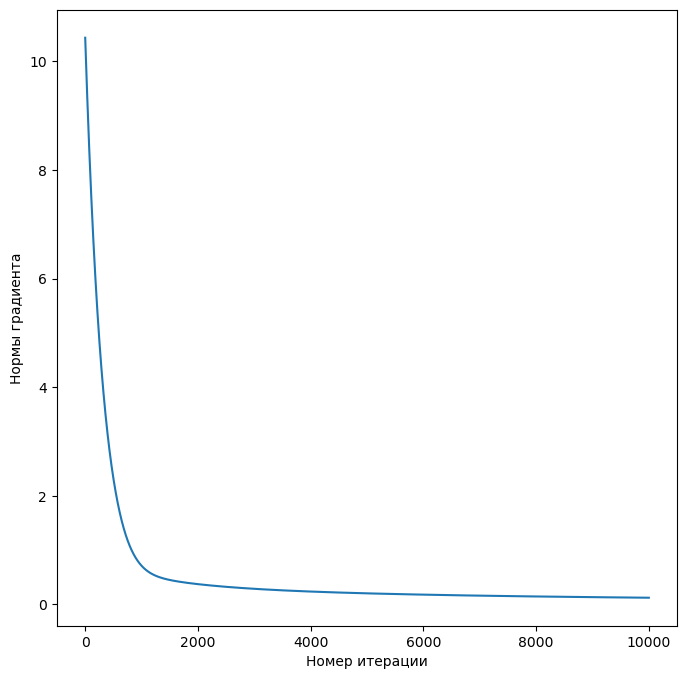

In [5]:
Y_gr=[]
def f(w):
    return  1/len(y)*(w.T @ X.T - y.T) * (X @ w - y)

def grad_f(w,X,y):
    #print(X.T.shape, X.shape, w.shape)
    return 1 / len(y) * 2. * (X.T @ X @ w - X.T @ y)

def gradient_descent(x0,X,y,N, gamma_k):
    x=x0
    k=0
    while(k<N):
        grad = grad_f(x,X,y)
        x=x- gamma_k* grad
        Y_gr.append(np.linalg.norm(grad))
        k=k+1
    return x



w0=np.array([0.0]*d)

w=w0
Y_gr=[]
#Y_gr.append(np.linalg.norm(w0))
#for i in range(10000):
    #w=gradient_descent(w,X_train,y_train,1, 10/L)
    #Y_gr.append(np.linalg.norm(w))

w=gradient_descent(w,X_train,y_train,10000, 10/L)

plt.figure(figsize=(8, 8))
X_gr=range(10000)
plt.plot(X_gr, Y_gr)
plt.xlabel('Номер итерации'), plt.ylabel('Нормы градиента')
plt.show()

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

Для оценки точности просто сравниваем $X\cdot w$ и $y$ поэлементно.

In [6]:
y_guessed = X_tst @ w
print(y_guessed, y_tst)
def check_guessed(y_guessed): #Функция считает число угаданных
    guessed = 0
    for i in range(len(w)):
        if np.round(y_guessed[i]) == y_tst[i]:
            guessed += 1
    return guessed
            
guessed = check_guessed(y_guessed)
print("Угадали", guessed, " из ",len(w), " Точность:", guessed/len(w)*100, "%")

[0.93104087 1.17781182 1.1499285  ... 1.34750868 1.14561846 1.2982467 ] [1. 1. 1. ... 2. 1. 2.]
Угадали 111  из  112  Точность: 99.10714285714286 %


In [7]:

def gradient_descent_modified(x0,X,y,N, gamma_k):
    guessed_arr = []
    x=x0
    k=0
    while(k<N):
        x=x-gamma_k*grad_f(x,X,y)
        y_guessed = X_tst@x
        guessed_arr.append(check_guessed(y_guessed))
        k=k+1
    return x, guessed_arr
_, guessed_arr=gradient_descent_modified(w0,X_train,y_train,1000, 10/L)

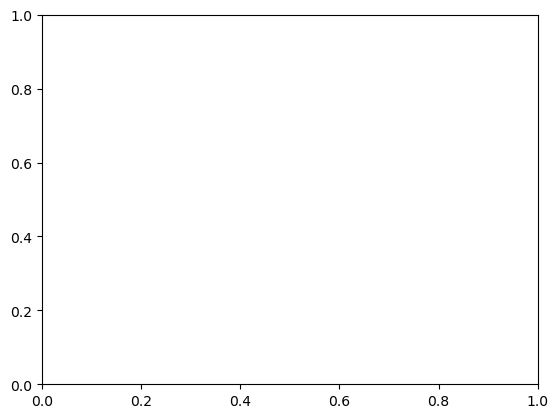

In [8]:

%matplotlib inline
ax = plt.axes()
plt.style.use('classic')

<ErrorbarContainer object of 3 artists>

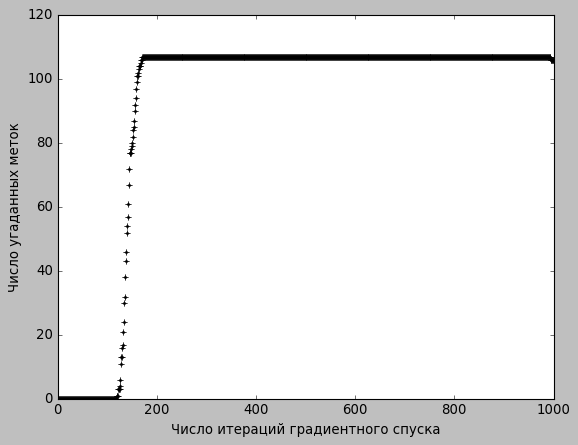

In [9]:
plt.ylabel("Число угаданных меток")
plt.xlabel("Число итераций градиентного спуска")
plt.errorbar(range(1000), guessed_arr, yerr = 0, xerr = 0, fmt = 'o',
color = '0', ms = 2, label = '')

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [10]:
def Proj(x, D):
  l1 = np.abs(x)
  if(l1.sum() <= D):
    return x
  sorted = np.sort(l1)[::-1]
  mas_sum = np.cumsum(sorted)
  non_zero_coordinates = np.nonzero(sorted * np.arange(1, d + 1) > (mas_sum - D))[0][-1]
  theta = float(mas_sum[non_zero_coordinates] - D) / (non_zero_coordinates + 1)
  w = (l1 - theta).clip(min=0)
  return w*np.sign(x)

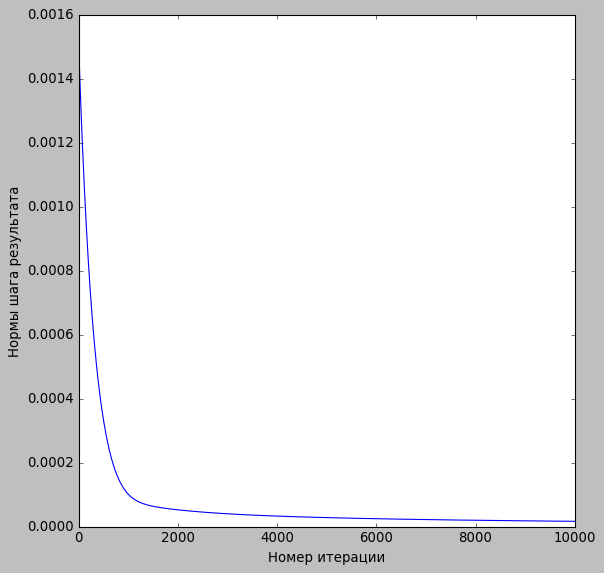

In [11]:
Y_gr=[]

def gradient_descent_2(x0,X,y,N, gamma_k,D):
    x=x0
    k=0
    while(k<N):
        x1=x
        x=x-gamma_k*grad_f(x,X,y)
        x=Proj(x,D)
        Y_gr.append(np.linalg.norm(x-x1))
        k=k+1
    return x
D=1
x0=np.array([0.0]*d)
#print(norm_f(x0))
#print(X_train.shape, y_train.shape,d)
w=gradient_descent_2(w0,X_train,y_train,10000, 10/L,d)
#print(w.shape)
plt.figure(figsize=(8, 8))
X_gr=range(10000)
plt.plot(X_gr, Y_gr)
plt.xlabel('Номер итерации'), plt.ylabel('Нормы шага результата')
plt.show()

In [12]:
y_guessed = X_tst @ w
print(y_guessed, y_tst)
guessed = check_guessed(y_guessed)
print("Угадали", guessed, " из ",len(w), " Точность:", guessed/len(w)*100, "%")

[0.93104087 1.17781182 1.1499285  ... 1.34750868 1.14561846 1.2982467 ] [1. 1. 1. ... 2. 1. 2.]
Угадали 111  из  112  Точность: 99.10714285714286 %


In [13]:
def gradient_descent_modified_2(x0,X,y,N, gamma_k,D):
        guessed_arr = []
        x=x0
        k=0
        while(k<N):
            x=x-gamma_k*grad_f(x,X,y)
            x=Proj(x,D)
            y_guessed = X_tst@x
            guessed_arr.append(check_guessed(y_guessed))
            k=k+1
        return x, guessed_arr
_, guessed_arr=gradient_descent_modified_2(w0,X_train,y_train,1000, 10/L, d)

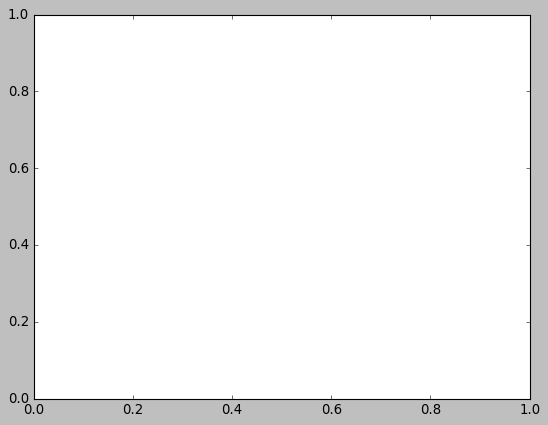

In [14]:

%matplotlib inline
ax = plt.axes()
plt.style.use('classic')

<ErrorbarContainer object of 3 artists>

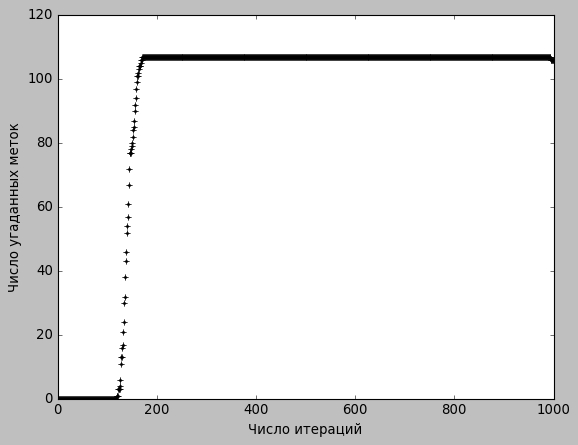

In [15]:
plt.ylabel("Число угаданных меток")
plt.xlabel("Число итераций")
plt.errorbar(range(1000), guessed_arr, yerr = 0, xerr = 0, fmt = 'o',
color = '0', ms = 2, label = '')

При сравнении графиков числа угаданных меток можно заметить, что данный метод не ускоряет работу алгоритма. Точность не улучшается из-за высокого качества изначального метода

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

1. Градиентный спуск использовать нельзя, потому что регуляризатор может изменить липшецевость

2. Модифицируем градиентный спуск, делая prox на каждом шаге
Запишем шаг нового алгоритма
$x^{k + 1} = \text{prox}_{\lambda r}(x^k - \gamma\nabla f(x^{k})) = \text{argmin}_{x \in \mathbb{R}^d}(\frac{1}{2} ||x^k - \gamma\nabla f(x^{k}) - x||^2 + \lambda r(x))$ 

Argmin достигается при $\nabla(\frac{1}{2} ||x^k - \gamma\nabla f(x^{k}) - x||^2 + \lambda r(x)) = 0$, тогда представим в виде 
$x^{k + 1} = x^{k} - \gamma \nabla f(x^k) - \lambda \nabla r(x^{k + 1})$

В случае $\|\cdot \|_1$ нормы регуляризатор не дифференцируем - используем "заглядывание в будущее".
Доопредять градиент в нуле будем по-разному.

Рассмотрим $\lambda$ - окрестность 0.

1. Вне этой окрестности $x_i^{k+1}$ и $x_i^{k+1}$ будут иметь одинаковый знак и мы дооперделяем градиент соответственно $+1$ или $-1$. 

$x^{k+1}_i = x^{k}_i - \gamma\nabla f(x^k)_i - \lambda$ при $x^{k}_i - \gamma\nabla f(x^k)_i > +\lambda$

$x^{k+1}_i = x^{k}_i - \gamma\nabla f(x^k)_i + \lambda$ при $x^{k}_i - \gamma\nabla f(x^k)_i < -\lambda$

2. Внутри окрестности доопределили нулем.
$x^{k+1}_i=0$ при $|x^{k}_i - \gamma\nabla f(x^k)_i |<\lambda$

В этом случае очевидно, что для хорошей точности стоит ставить $\lambda$ как можно меньше. Нам нужно занулить некоторые признаки, это приводит к появлению нижней границы $\lambda$. Я остановился на 0.001, в значених больше точность плохая, меньше - занулений нет. 

Норма почти не менялась, но это будет происходить в пункте с $l_2$

In [16]:
L = 1/n_train * 2 * max(np.linalg.eigvalsh((X_train.T@X_train)))
mu = 1/n_train * 2  * min(np.linalg.eigvalsh((X_train.T@X_train)))
lamb = 0.001
iter_number = 1000


time_arr0=[]
accuracy0 = []
criterion0 = []

def Gradient_descent_modified(X, y, w0, gamma, iter_number, n, lamb):
    w = w0
    
    start_time = time.time()
    for i in range(iter_number):
        gr = grad_f(w,X,y)
        for j in range(d):
            w2 = w[j] - gamma*gr[j]
            if(w2 > lamb):
                w[j] = w2 - lamb
            elif(w2 < -lamb):
                w[j] = w2 + lamb
            else:
                w[j] = 0
          
        time_arr0.append(time.time() - start_time)
        criterion0.append(np.linalg.norm(gr))
        accuracy0.append(list(np.around(X_tst@w) - y_tst).count(0)/len(y_tst))
    return w


w = Gradient_descent_modified(X_train, y_train, np.ones(d), 1/(L), iter_number, n_train, lamb)
print("w = ", w)
print("|w|_1 = ", np.linalg.norm(w, ord = 1))

w =  [ 0.          0.          0.          0.          0.01287518  0.
  0.          0.          0.          0.          0.09261116  0.
  0.          0.          0.          0.          0.02463353  0.02463353
  0.          0.          0.00217206  0.          0.4400724   0.
 -0.01544453  0.          0.4400724   0.55824854  0.          0.
  0.          0.          0.22708619  0.          0.          0.22588039
  0.          0.          0.01005886  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.0315051   0.          0.10862781  0.
  0.          0.          0.02270626  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01582481  0.          0.          0.          0.          0.
  0.          0.          0.          0.00461539  0.          0.20393716
  0.          0.          0.22708619  0.          0.          0.16653039
  0.          0.          0.          0.04568314  0. 

In [17]:
print(w.size-list(w).count(0), " не нули")

28  не нули


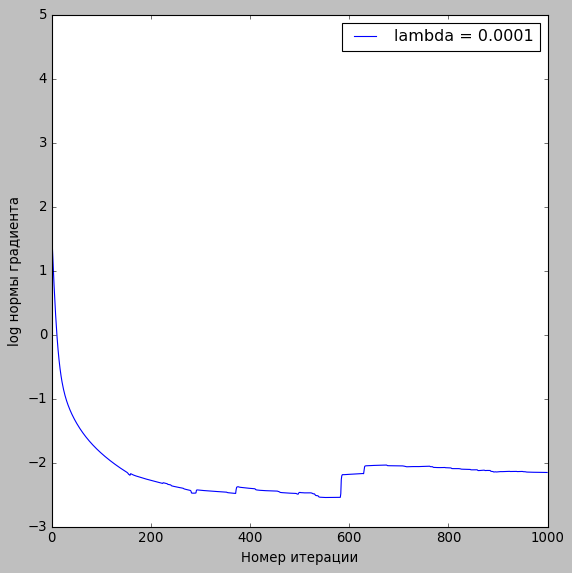

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(criterion0)), np.log(criterion0), label = 'lambda = 0.0001')
plt.xlabel('Номер итерации'), plt.ylabel('log нормы градиента')

plt.legend()
plt.show()

Точность:  0.791871921182266


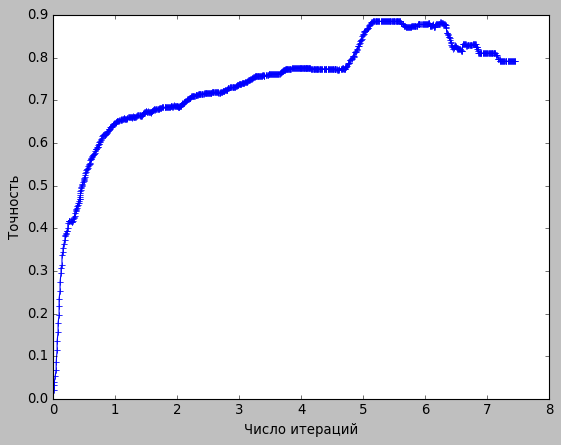

In [19]:
plt.ylabel("Точность")
plt.xlabel("Число итераций")
plt.errorbar(time_arr0, accuracy0, yerr = 0, xerr = 0,
label = '')
print("Точность: ", accuracy0[-1])

В случае 2 нормы $x^{k + 1} = \frac{x^{k} - \gamma \nabla f(x^k)}{1 + 2\lambda}$

В этом случае увеличение $\lambda$ приводит к падению точности, пониежение - к росту нормы $w$. 

Я остановился на значении $0.005$ с точностью 90% и $|w|_2 = 0,75$

In [20]:
lamb = 0.005

accuracy1 = []
criterion1 = []
time_arr1 = []

def Gradient_descent_modified_1(X, y, w0, gamma, iter_number, n, lamb):
    w = w0
    
    start_time = time.time()
    for i in range(iter_number):
        gr = grad_f(w,X,y)
        w = (w - gamma * gr)/(1 + lamb)
        
        time_arr1.append(time.time() - start_time)
        accuracy1.append(list(np.around(X_tst@w) - y_tst).count(0)/len(y_tst))
        criterion1.append(np.linalg.norm(gr))
    return w

w = Gradient_descent_modified_1(X_train, y_train, np.ones(d), 1/(L), iter_number, n_train, lamb)
print("w = ", w)
print("|w|_2 = ", np.linalg.norm(w, ord = 2))


w =  [ 0.00275347  0.03182869  0.03456159  0.03734257  0.03897388  0.03559304
  0.07489213  0.01082589 -0.00115091  0.0828413   0.03169891 -0.03677987
  0.03377365  0.03297096  0.04010451 -0.03890976  0.02891685  0.02891685
  0.0137924   0.0738584   0.1046976   0.04906597  0.17499622 -0.12305501
 -0.12371079  0.00595289  0.17499622  0.29511185 -0.14543653 -0.02570801
 -0.03162635  0.01247537  0.14128819  0.03335948  0.12040408  0.21785916
 -0.06409559 -0.03818505  0.04342094  0.01926137  0.01135445  0.0415039
  0.00927337  0.05313637  0.02923507 -0.02510597  0.02672675  0.04369997
  0.00766655  0.08928397  0.0644796   0.00682242  0.12596787 -0.01168597
  0.04630408  0.03137295  0.07400652  0.00034134  0.06168759  0.00595289
  0.00541235  0.04440103  0.03764682  0.01247537  0.00541235  0.02522055
  0.05817671  0.00682242  0.00595289  0.00988542  0.04393393  0.03753731
  0.01247537  0.02151791  0.02845053  0.05493194 -0.01316481  0.14694115
  0.00682242  0.00820629  0.14128819  0.0110915

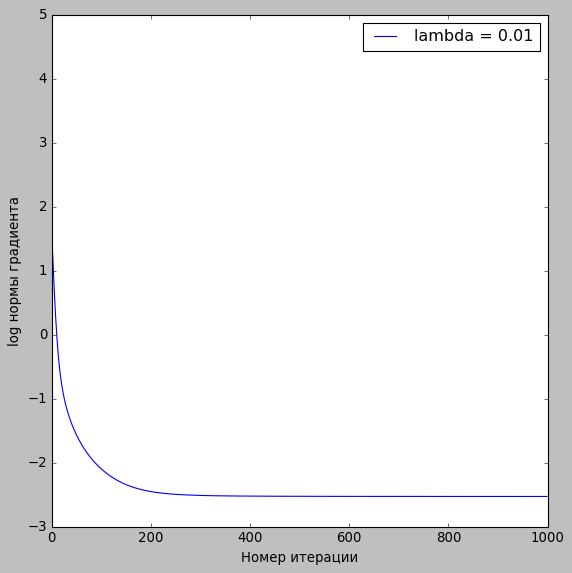

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(criterion1)), np.log(criterion1), label = 'lambda = 0.01')
plt.xlabel('Номер итерации'), plt.ylabel('log нормы градиента')

plt.legend()
plt.show()

0.9045566502463054


<ErrorbarContainer object of 3 artists>

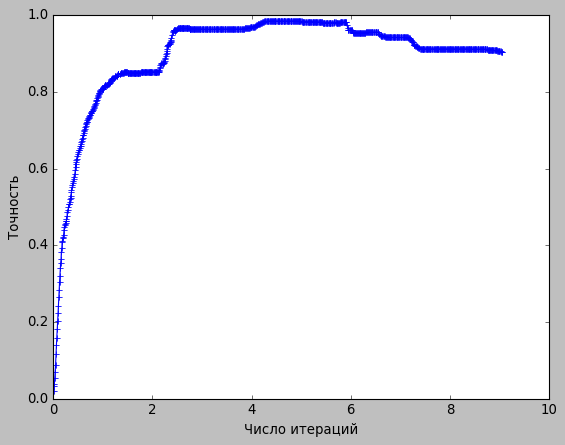

In [22]:
print(accuracy1[-1])
plt.ylabel("Точность")
plt.xlabel("Число итераций")
plt.errorbar(time_arr1, accuracy1, yerr = 0, xerr = 0,
label = '')

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

Основная идея: используем сингулярное разложение, чтобы получить матрицу ранга меньше и упростить вычисления.
    
В статье выше использована теорема Эккарта - Янга: если потребовать, чтобы приближение было наилучшим в том смысле, что евклидова норма разности матриц 
$M$ и $M_k$ минимальна при ограничении на $rank(M_k)$, то наилучшая такая матрица получается из сингулярного разложения $M$.

В статье так же сказано, что необходимо 'обрезать' матрицу, упорядочив сингулярные числа в порядке невозрастания, то есть взять $n$ самых больших.


Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [23]:
from sklearn.decomposition import PCA
n_ch=30
pca = PCA(n_components=n_ch)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.19785583 0.30722471 0.39550556 0.47053587 0.51580888 0.55340452
 0.58627853 0.61552171 0.64367664 0.66748183 0.6890922  0.7092532
 0.72691734 0.74426639 0.76100498 0.77610184 0.7900257  0.80260729
 0.81490032 0.82610386 0.83697276 0.84769845 0.85789415 0.86764087
 0.87725269 0.88627227 0.8944746  0.90189155 0.90891908 0.91565681]


In [24]:
y_train = 2*y_train - 3
y_tst = 2*y_tst - 3
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_tst)

d_new = n_ch
print(X_train_new.shape, y_train.shape)

(6499, 30) (6499,)


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

В эксперименте c $l_1$-регуляризатором мы уже зануляли некоторые признаки. Как видно выше, там не было 'занулено' 28 параметров, мы берем $n=30$. 

Итоговая точность в данном случае будет примерно 70%

In [25]:
lamb = 0.001
iter_number = 1000

time_arr2 = []
accuracy2 = []
criterion2 = []

def Gradient_descent_modified_2(X, y, w0, gamma, iter_number, n, d):
    start_time = time.time()
    w = w0
    
    for i in range(iter_number):
        gr = grad_f(w,X,y)
        
        for j in range(d):
            w2 = w[j] - gamma*gr[j]
            if(w2 > lamb):
                w[j] = w2 - lamb
            elif(w2 < -lamb):
                w[j] = w2 + lamb
            else:
                w[j] = 0
                
        time_arr2.append(time.time() - start_time)
        accuracy2.append((list(np.around(X_test_new@w) - y_tst).count(0)/len(y_tst)))
        criterion2.append(np.linalg.norm(gr))
    return w


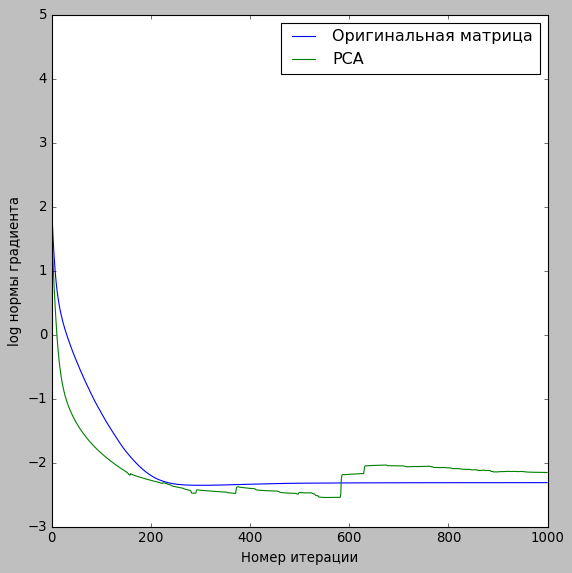

In [26]:
w = Gradient_descent_modified_2(X_train_new, y_train, np.ones(d_new), 1/L, iter_number, n_train, d_new)

plt.figure(figsize=(8, 8))
plt.plot(range(len(criterion2)), np.log(criterion2), label = 'Оригинальная матрица')
plt.plot(range(len(criterion0)), np.log(criterion0), label = 'PCA')
plt.xlabel('Номер итерации'), plt.ylabel('log нормы градиента')

plt.legend()
plt.show()

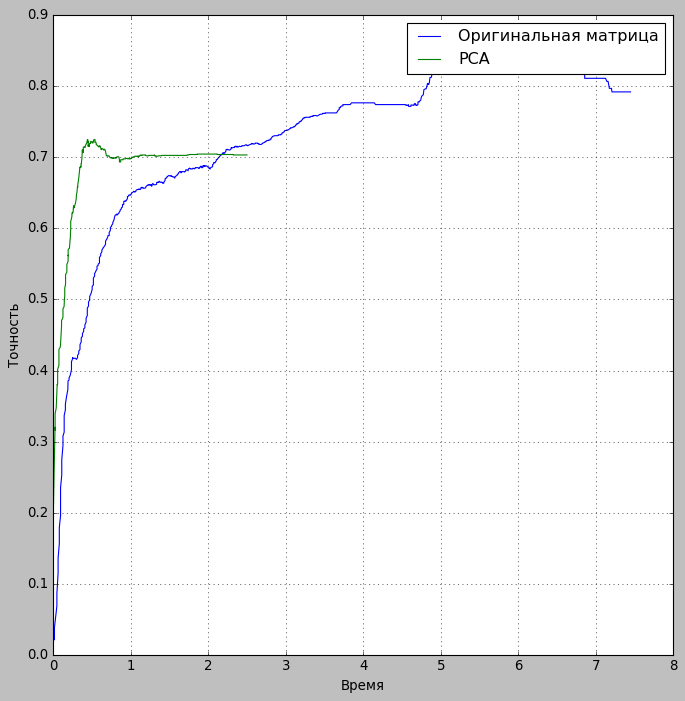

In [27]:
plt.figure(figsize=(10, 10))

plt.plot(time_arr0, accuracy0, label = 'Оригинальная матрица')
plt.plot(time_arr2, accuracy2, label = 'PCA')

plt.ylabel('Точность'), plt.xlabel('Время')
plt.legend()
plt.grid(ls=':')
plt.show()

Для второй нормы:

In [28]:
lamb = 0.001
iter_number = 1000

time_arr3 = []
accuracy3 = []
criterion3 = []

def Gradient_descent_modified_3(X, y, w0, gamma, iter_number, n, d):
    w = w0
    
    start_time = time.time()
    for i in range(iter_number):
        gr = grad_f(w,X,y)
        w = (w - gamma * gr)/(1 + lamb)
        
        time_arr3.append(time.time() - start_time)
        accuracy3.append(list(np.around(X_test_new@w) - y_tst).count(0)/len(y_tst))
        criterion3.append(np.linalg.norm(gr))
    return w


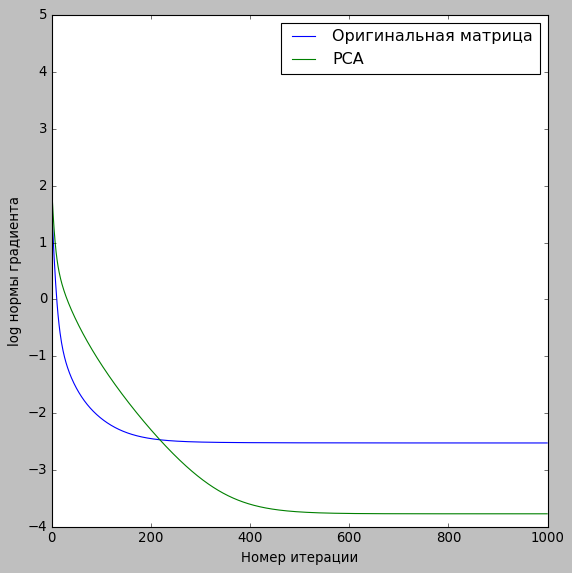

In [29]:
w = Gradient_descent_modified_3(X_train_new, y_train, np.ones(d_new), 1/L, iter_number, n_train, d_new)

plt.figure(figsize=(8, 8))
plt.plot(range(len(criterion1)), np.log(criterion1), label = 'Оригинальная матрица')
plt.plot(range(len(criterion3)), np.log(criterion3), label = 'PCA')
plt.xlabel('Номер итерации'), plt.ylabel('log нормы градиента')

plt.legend()
plt.show()

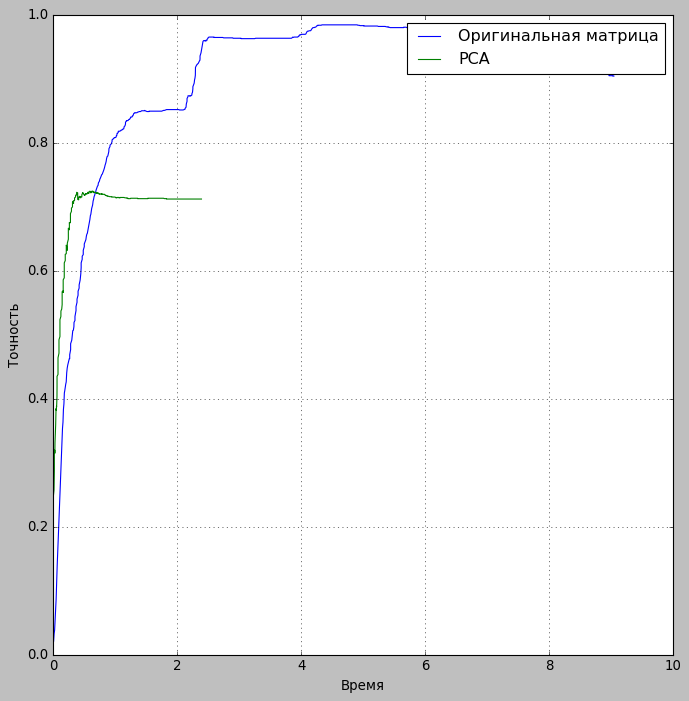

In [30]:
plt.figure(figsize=(10, 10))

plt.plot(time_arr1, accuracy1, label = 'Оригинальная матрица')
plt.plot(time_arr3, accuracy3, label = 'PCA')

plt.ylabel('Точность'), plt.xlabel('Время')
plt.legend()
plt.grid(ls=':')
plt.show()

In [31]:
print(accuracy2[-1],accuracy3[-1])

0.7032019704433498 0.7124384236453202


Заметно, что можно поставить итоговую точность больше. 
По критерию метод с PCA быстрее

Методом с использованием PCA одно и то же количество шагов выполнено намного быстрее по времени.